<a href="https://colab.research.google.com/github/subhedarsoham18/Mall-Customer-Segmentation-Data/blob/main/Mall_Customer_Segmentation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv('Mall_Customers.csv')

# Drop non-numeric columns for clustering
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

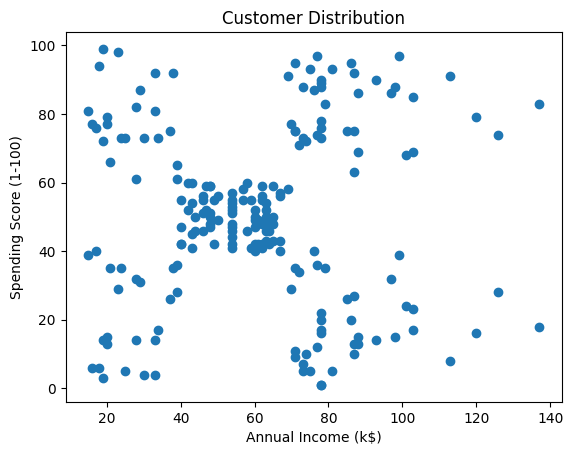

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

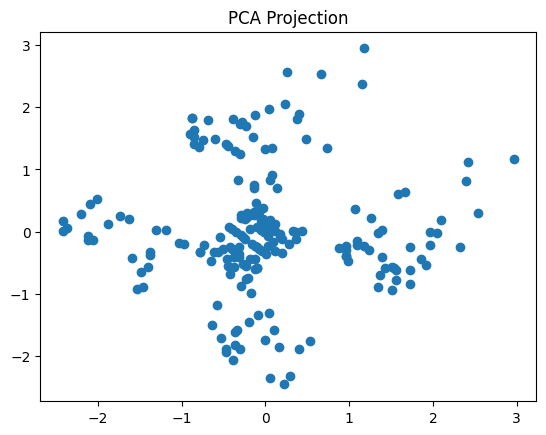

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title('PCA Projection')
plt.show()


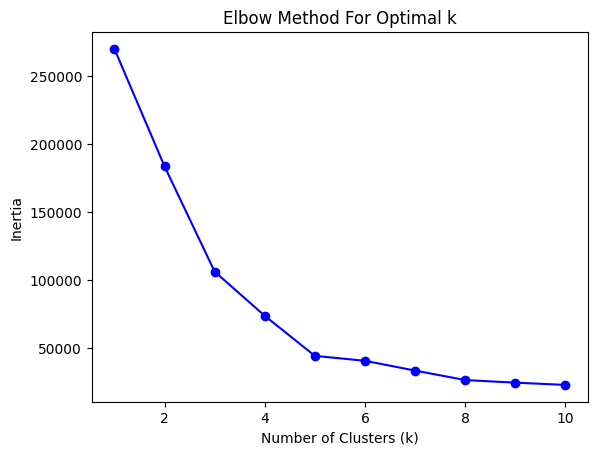

In [7]:
inertia = []
k_range = range(1, 11)

from sklearn.cluster import KMeans
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

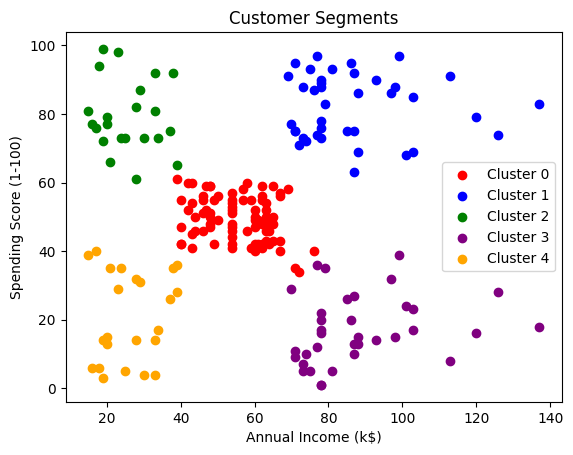

In [10]:
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                color=colors[i], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.show()

In [11]:
# Assuming 5 clusters based on the elbow method plot from the previous step
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init for reproducibility
df['Cluster'] = kmeans.fit_predict(data)